1. GDP per capita affects the prevalence of medical doctors per region?
2. Create a Scatterplot and perform a Line Regression 
3. GDP Per Capital vs Life Expectancy per region
4. Create a Scatterplot and perform a Line Regressin/(other anaylisis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from numpy.random import normal
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
pd.options.mode.copy_on_write = True


In [2]:
#open require dataframe
path = 'Data/totalavgfilter.csv'
country_doctors_total_avg_filtered = pd.read_csv(path)
country_doctors_total_avg_filtered.isnull().sum()


Country                                  0
GDP                                      0
Per Capita                               0
DPT Immunization                         0
HepB3 Immunization                       0
Measles Immunization                     0
Hospital beds                            0
Basic sanitation services                0
Urban population                         0
Rural population                         0
Population, female (percent of total)    0
Medical doctors (number)                 0
Life expectancy total population         0
dtype: int64

In [3]:
country_doctors_total_avg_filtered
country_doctors_total_avg_filtered = country_doctors_total_avg_filtered.rename(columns={'Life expectancy total population':'Life Expectancy'})
country_doctors_total_avg_filtered.head()

,Country,GDP,Per Capita,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Urban population,Rural population,"Population, female (percent of total)",Medical doctors (number),Life Expectancy
0,Afghanistan,1.857138e+10,512.909526,65.8,65.8,63.8,0.450889,45.802640,25.2644,74.7356,49.429954,9500.4,64.149149
1,Albania,1.336488e+10,4658.240106,98.8,98.8,95.6,3.052308,98.493376,59.3572,40.6428,49.884581,4826.0,78.355262
2,Algeria,1.685577e+11,4073.145408,91.8,91.8,87.4,1.820000,86.449686,72.0354,27.9646,49.045001,73456.5,76.491339
3,Angola,1.060423e+11,3573.626620,58.8,54.8,47.8,0.800000,49.678755,64.8250,35.1750,50.627161,6496.5,60.446212
4,Antigua and Barbuda,1.506947e+09,15784.778096,95.2,96.0,93.4,2.934250,86.711731,24.7328,75.2672,52.309463,264.0,76.772637


In [4]:
wrd_pop_path = 'Data/World-population-by-countries-dataset.csv'
pop_data = pd.read_csv(wrd_pop_path)

In [5]:
pop_data.isnull().sum()

Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2017            2
2018            2
2019            2
2020            2
2021            2
Length: 64, dtype: int64

In [6]:
#clean data, remain only year 2015-2019 data set
pop_5yr = pop_data[['Country Name','2015','2016','2017','2018','2019']]

pop_5yr = pop_5yr.dropna(axis=0, subset=['2015'])
pop_5yr.isnull().sum()

Country Name    0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64

In [7]:
pop_5yr

,Country Name,2015,2016,2017,2018,2019
0,Aruba,104339.0,104865.0,105361.0,105846.0,106310.0
1,Africa Eastern and Southern,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0
2,Afghanistan,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0
3,Africa Western and Central,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0
4,Angola,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0
...,...,...,...,...,...,...
261,Kosovo,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0
262,"Yemen, Rep.",26497881.0,27168210.0,27834811.0,28498683.0,29161922.0
263,South Africa,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0
264,Zambia,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0


In [8]:
#find average population, merge data
#in the main country_doctors_total_avg_filtered

pop_5yr = pop_5yr.rename(columns={'Country Name':'Country'})
pop_5yr['Average Population'] = pop_5yr[['2015','2016','2017','2018','2019']].mean(axis=1)
pop_5yr['Average Population'] = pop_5yr['Average Population'].fillna(pop_5yr['Average Population'].median())
pop_5yr = pop_5yr.drop(['2015','2016','2017','2018','2019'],axis=1)

pop_5yr.shape

(264, 2)

In [9]:
pop_5yr.isnull().sum()

Country               0
Average Population    0
dtype: int64

In [10]:
country_doctors_total_avg_filtered.isnull().sum()


Country                                  0
GDP                                      0
Per Capita                               0
DPT Immunization                         0
HepB3 Immunization                       0
Measles Immunization                     0
Hospital beds                            0
Basic sanitation services                0
Urban population                         0
Rural population                         0
Population, female (percent of total)    0
Medical doctors (number)                 0
Life Expectancy                          0
dtype: int64

In [11]:
df = country_doctors_total_avg_filtered.merge(pop_5yr,how='left',on='Country')
df.isnull().sum()

Country                                  0
GDP                                      0
Per Capita                               0
DPT Immunization                         0
HepB3 Immunization                       0
Measles Immunization                     0
Hospital beds                            0
Basic sanitation services                0
Urban population                         0
Rural population                         0
Population, female (percent of total)    0
Medical doctors (number)                 0
Life Expectancy                          0
Average Population                       2
dtype: int64

In [12]:
df = df.dropna(axis=0, subset=['Average Population'])
df.shape

(148, 14)

In [13]:
#calculate Male & Female population to the pop_5yr dataframe 
#find the average medical doctor per capita 
df = df.rename(columns={'Population, female (percent of total)':'Female Population in percentage'})
df["Female Polulation"] = df["Female Population in percentage"] /100 * df["Average Population"]
df["Male Population"] = df["Average Population"] - df["Female Polulation"]
df["Medical Doctor Per Capita"] = (df['Medical doctors (number)'] / df['Average Population'])
df['Medical Doctor Per Capita'] = df['Medical Doctor Per Capita'].apply(lambda x: round(x, 8))
df["No.Patient Per Doctor"] = 1 / df["Medical Doctor Per Capita"]
df.head()

,Country,GDP,Per Capita,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Urban population,Rural population,Female Population in percentage,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
0,Afghanistan,1.857138e+10,512.909526,65.8,65.8,63.8,0.450889,45.802640,25.2644,74.7356,49.429954,9500.4,64.149149,36261284.2,1.792394e+07,1.833735e+07,0.000262,3816.793893
1,Albania,1.336488e+10,4658.240106,98.8,98.8,95.6,3.052308,98.493376,59.3572,40.6428,49.884581,4826.0,78.355262,2870165.6,1.431770e+06,1.438396e+06,0.001681,594.728328
2,Algeria,1.685577e+11,4073.145408,91.8,91.8,87.4,1.820000,86.449686,72.0354,27.9646,49.045001,73456.5,76.491339,41390012.2,2.029973e+07,2.109028e+07,0.001775,563.462817
3,Angola,1.060423e+11,3573.626620,58.8,54.8,47.8,0.800000,49.678755,64.8250,35.1750,50.627161,6496.5,60.446212,29835743.4,1.510499e+07,1.473075e+07,0.000218,4592.633416
4,Antigua and Barbuda,1.506947e+09,15784.778096,95.2,96.0,93.4,2.934250,86.711731,24.7328,75.2672,52.309463,264.0,76.772637,95382.6,4.989413e+04,4.548847e+04,0.002768,361.297782


In [14]:
#final_df prepared df.drop(df.columns[[0, 1, 2]],axis = 1)
f_df = df.drop(df.columns[[3,4,5,6,7,8,9,10]],axis = 1)
f_df = f_df.sort_values(by='Per Capita', ascending=True)

f_df.head()

,Country,GDP,Per Capita,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
24,Burundi,2.777063e+09,257.387657,892.000000,60.875798,10836200.4,5.460094e+06,5.376107e+06,0.000082,12147.716229
28,Central African Republic,2.006896e+09,434.875413,329.500000,52.170470,4607686.2,2.301317e+06,2.306369e+06,0.000072,13984.058174
84,Malawi,8.331166e+09,467.790419,1649.500000,63.283140,17678543.0,9.093972e+06,8.584571e+06,0.000093,10716.964956
95,Mozambique,1.426752e+10,498.032076,2407.666667,59.111772,28676598.0,1.462774e+07,1.404886e+07,0.000084,11910.433540
83,Madagascar,1.284253e+10,501.083962,5230.000000,66.303041,25586116.0,1.275391e+07,1.283220e+07,0.000204,4892.128565


The r value is 0.4091464817691621


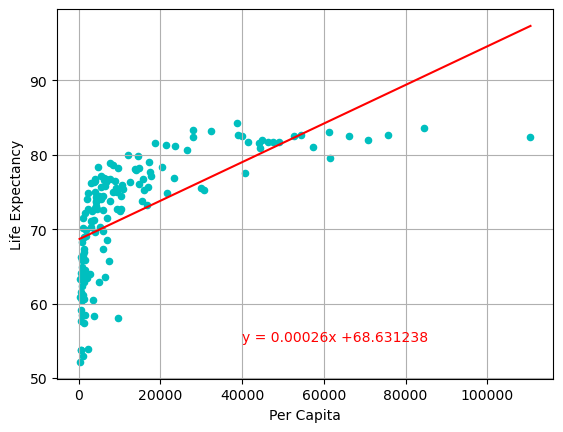

In [15]:
f_df.plot(x='Per Capita', y='Life Expectancy', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = f_df['Per Capita']
y_values = f_df['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(40000,55),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")


In [16]:
np.corrcoef(x_values, y_values)[0,1]


0.639645590752537

The r value is 0.3028521372456931


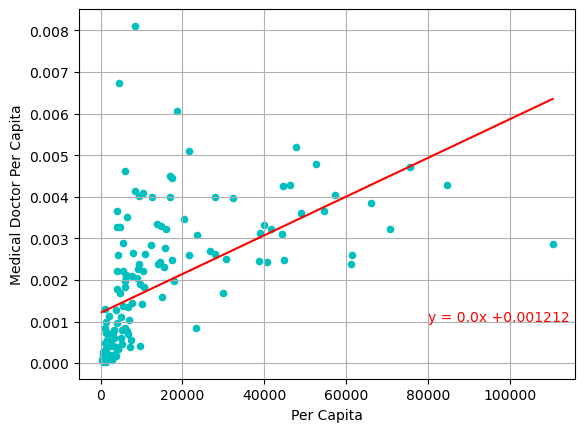

In [17]:
#GDP per capita affects the prevalence of medical doctors per region

f_df.plot(x='Per Capita', y='Medical Doctor Per Capita', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = f_df['Per Capita']
y_values = f_df['Medical Doctor Per Capita']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(80000,0.001),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

In [18]:
np.corrcoef(x_values, y_values)[0,1]

0.5503200316594818

In [19]:
#get a new df show top 20 and bottom 20 base on GDP per capita
top_df = f_df.tail(20)
top_df = top_df.sort_values(by='Per Capita', ascending=False)



In [20]:
top_df['No.Patient Per Doctor'].mean()


295.2061423901645

In [21]:
bottom_df = f_df.head(20)
bottom_df

,Country,GDP,Per Capita,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
24,Burundi,2.777063e+09,257.387657,892.000000,60.875798,10836200.4,5.460094e+06,5.376107e+06,0.000082,12147.716229
28,Central African Republic,2.006896e+09,434.875413,329.500000,52.170470,4607686.2,2.301317e+06,2.306369e+06,0.000072,13984.058174
84,Malawi,8.331166e+09,467.790419,1649.500000,63.283140,17678543.0,9.093972e+06,8.584571e+06,0.000093,10716.964956
95,Mozambique,1.426752e+10,498.032076,2407.666667,59.111772,28676598.0,1.462774e+07,1.404886e+07,0.000084,11910.433540
83,Madagascar,1.284253e+10,501.083962,5230.000000,66.303041,25586116.0,1.275391e+07,1.283220e+07,0.000204,4892.128565
0,Afghanistan,1.857138e+10,512.909526,9500.400000,64.149149,36261284.2,1.792394e+07,1.833735e+07,0.000262,3816.793893
102,Niger,1.139859e+10,525.392586,607.800000,61.577659,21629278.0,1.066245e+07,1.096683e+07,0.000028,35587.188612
125,Sierra Leone,3.954916e+09,528.414539,566.000000,53.833848,7490507.6,3.740042e+06,3.750466e+06,0.000076,13234.515617
58,Guinea-Bissau,1.304336e+09,711.125659,299.666667,57.622945,1828601.6,9.278306e+05,9.007710e+05,0.000164,6102.025873
79,Liberia,3.351710e+09,713.237500,207.000000,63.250277,4703518.2,2.366556e+06,2.336962e+06,0.000044,22722.108612


In [22]:
bottom_df['No.Patient Per Doctor'].mean()

11462.985151976576

In [23]:
#create a box plot demonstrating the top 20 and bottom 20 gpd country in comparision on life expectancy

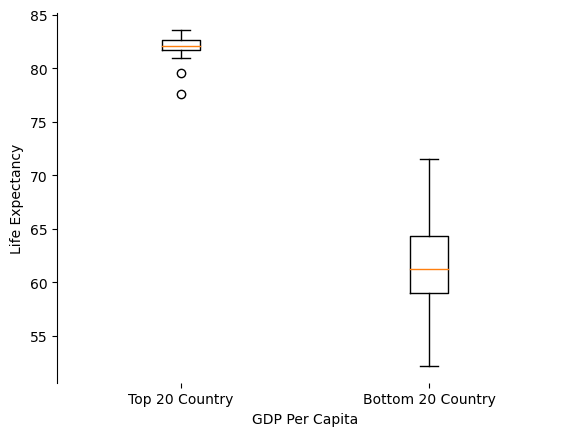

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Life Expectancy')
ax1.set_xlabel('GDP Per Capita')
ax1.boxplot([top_df['Life Expectancy'], bottom_df['Life Expectancy']], labels = ["Top 20 Country", "Bottom 20 Country"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()





In [25]:
#create a box plot demonstrating the top 20 and bottom 20 gpd country in comparision on medical doctors per capita

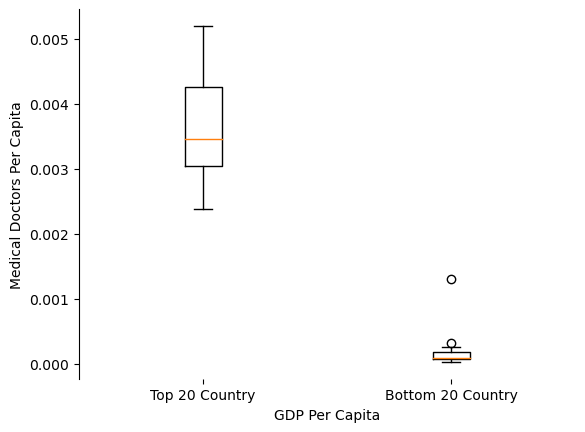

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Medical Doctors Per Capita')
ax1.set_xlabel('GDP Per Capita')
ax1.boxplot([top_df['Medical Doctor Per Capita'], bottom_df['Medical Doctor Per Capita']], labels = ["Top 20 Country", "Bottom 20 Country"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

In [27]:
#box plot for patients per doctor vs gpd for top and bottom 20 countries


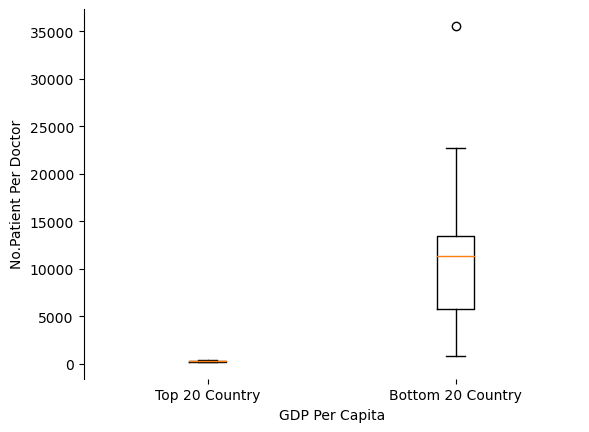

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('No.Patient Per Doctor')
ax1.set_xlabel('GDP Per Capita')
ax1.boxplot([top_df['No.Patient Per Doctor'], bottom_df['No.Patient Per Doctor']], labels = ["Top 20 Country", "Bottom 20 Country"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

In [29]:
f_df['Per Capita'] = np.log(f_df['Per Capita'])
f_df.head()
             

,Country,GDP,Per Capita,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
24,Burundi,2.777063e+09,5.550583,892.000000,60.875798,10836200.4,5.460094e+06,5.376107e+06,0.000082,12147.716229
28,Central African Republic,2.006896e+09,6.075060,329.500000,52.170470,4607686.2,2.301317e+06,2.306369e+06,0.000072,13984.058174
84,Malawi,8.331166e+09,6.148020,1649.500000,63.283140,17678543.0,9.093972e+06,8.584571e+06,0.000093,10716.964956
95,Mozambique,1.426752e+10,6.210664,2407.666667,59.111772,28676598.0,1.462774e+07,1.404886e+07,0.000084,11910.433540
83,Madagascar,1.284253e+10,6.216774,5230.000000,66.303041,25586116.0,1.275391e+07,1.283220e+07,0.000204,4892.128565


The r value is 0.7036744908037691


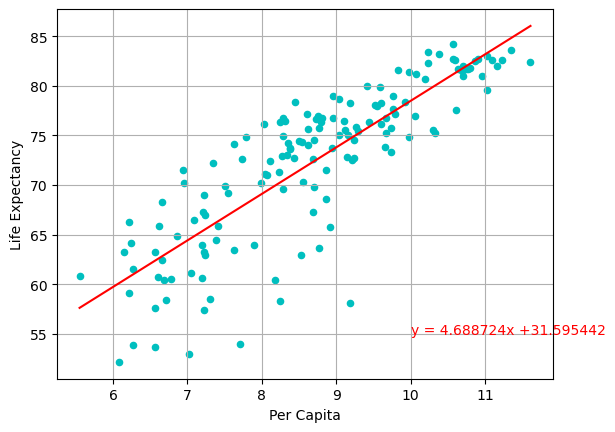

In [30]:
f_df.plot(x='Per Capita', y='Life Expectancy', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = f_df['Per Capita']
y_values = f_df['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(10,55),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")


In [31]:
np.corrcoef(x_values, y_values)[0,1]


0.8388530805831073

The r value is 0.5266820259163236


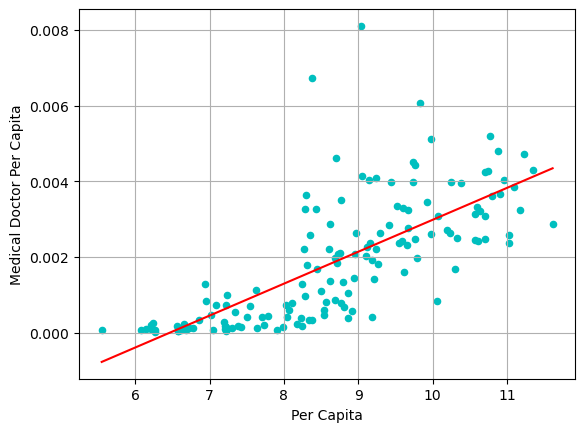

In [32]:
#GDP per capita affects the prevalence of medical doctors per region

f_df.plot(x='Per Capita', y='Medical Doctor Per Capita', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = f_df['Per Capita']
y_values = f_df['Medical Doctor Per Capita']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(80000,30000),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

In [33]:
np.corrcoef(x_values, y_values)[0,1]


0.7257286172642798

#                                                  Analysis


This notebook focused on the correlation between GDP per capita with the life expectancy and medical doctor per capita based on 149(filtered) country.

By comparing the GDP per capita and life expectancy column, after perfroming a correlation hypothesis test (linear regression), it returns a correlation coeffient of 0.639, this indicates that a optimum positive relation between GDP and life expectancy, meaning the higher GDP per capita, the reletive life expectancy will be higher. 

The correlation test between the GDP per capita and medical doctors per captial returns a correlation coeffecient of 0.550, it also desmonstrate moderate amount of relaton between the two features. 

A new data frame was created to compare between the top 20 and bottom GDP percapita countries. The box plot graph demonstrated the difference of life expectancy and medical doctor per capita between these two group.
The average life expectancy of the top 20 GDP per capita country is 82, and the average life expectancy of the bottom 20 GDP per capita country is 62, there is a 20 years difference!

In terms of medical doctors per capital, since it is hard to visualize this data(the number has too many decimals),hence the number of patient per doctor column was created to better illustrate the data.

The box plot graph demonstrate an average of 295 patient per doctor vs the 11462 patient per doctor between top and bottom 20 countries. Theres is over 30 times in difference in medical doctors avaiblable per person. 

In conclusion, it is obvious that counties with more GDP provide with more medical doctors per capita, and hence more life expectancy. However, since this anaylsis only compare GDP, medical doctors, and life expectancy, there are alot of more factors need to be included in future for a more accurate prediction, factors such as countries location, infrustructures, education, for a more accurate model to be built, alot of other aspects of correlations has to be adopted. 